<a href="https://colab.research.google.com/github/minju2140/tensorflow/blob/main/1_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EC%99%80_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow import keras #tensorflow 안에 keras사용
from tensorflow.keras import layers

## 샘플 데이터 생성

In [3]:
x = np.array([1,3,5,6,10], dtype=np.float32)
y = np.array([0.5, 1, 2, 1.8, 3], dtype=np.float32)

## 케라스 모델 생성
자동 임의 weight 초기화  
`h(x)=wx+b` 구현

  모델 객체가 생성됨과 동시에 초기에는 임의의 값이 init_w, init_b에 저장된다.

In [5]:
# 모델 객체를 생성함과 동시에 w, b를 임의의 숫자로 초기화한다.
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[1], activation="linear") #unit=layer안에 존재하는 유닛이 단 하나, input이 1개(x값), activation 함수는 선형 함수로
])
#keras 모델에서는 b(bias)값이 있다고 암묵적으로 지정.
#그래서 input_shape는 x만 존재.
#x와 b값이 들어왔을 때, 어떻게 활성화 시킬 것인가~
#선형 모델로 가지고 놀겠다~
#최종 결과로 나오는 것은 h(x)=wx+b가 나옴.
#w는 선의 가중치이다.
init_w, init_b = model.weights #w와 b의 초기값(임의의 랜던값으로 초기화됨.)
print(init_w, init_b)

<Variable path=sequential_1/dense_1/kernel, shape=(1, 1), dtype=float32, value=[[1.4230367]]> <Variable path=sequential_1/dense_1/bias, shape=(1,), dtype=float32, value=[0.]>


#### 샘플 데이터 산점도와 모델이 생성될 때 만들어진 임의 직선을 시각화


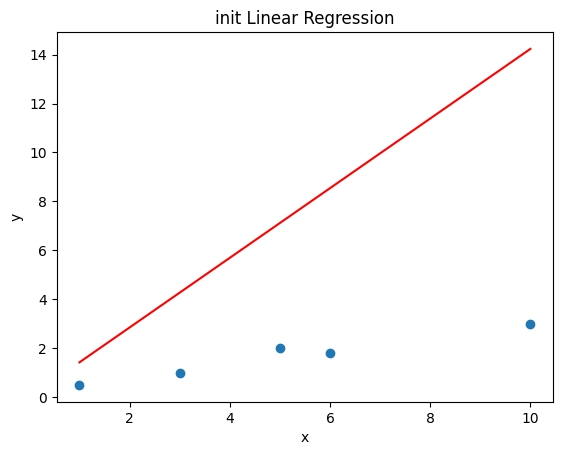

In [6]:
plt.scatter(x, y)
plt.plot(x, init_w[0][0] * x + init_b[0], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('init Linear Regression')
plt.show()

### 만약, `h(x)=2x+1`을 만족하는 식을 찾고 싶다면
배운대로, MSE를 비용함수로 설정하고 Gradient Decent를 사용하여 모델을 학습시킨 다음, 적합한 w, b를 찾아낼 수 있다.

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 61.8625  
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28.4764
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.1633
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.7498
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.3637
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.7097
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2983
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2897
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1121 
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0768     



학습된 w: 0.3614618480205536, b: -0.13883744180202484





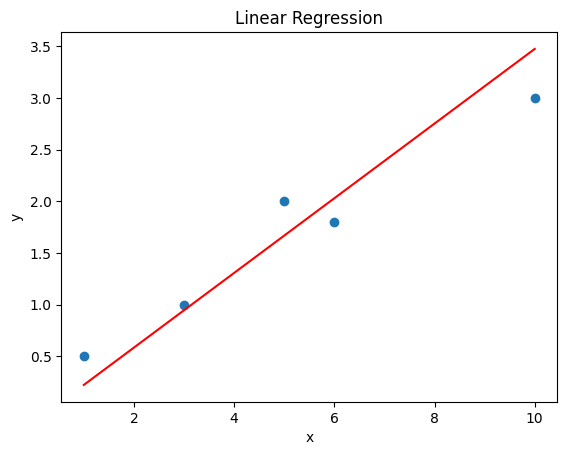

In [7]:
# 모델 컴파일 과정
sgd = keras.optimizers.SGD(learning_rate=0.001) # 경사하강법 learnig rate(알파값, 학습률)를 0.001로 설정하고
#sgd변수에 optimizer최적화 알고리즘을 설정-Stochastic Gradient Descent(SGD, 확률적 경사하강법)
model.compile(optimizer=sgd, loss='mean_squared_error') # MSE를 비용함수로 설정
#모델 컴파일-optimizer로는 sgd, 손실함수, 비용 함수는 MSE사용.

# 학습
history = model.fit(x, y, batch_size=1, epochs=10)
#batch size는 한번에 몇개의 데이터를 훈련시킬 거냐~
#epochs(에포크) 전체 데이터를 몇번 씩 돌릴거냐~10번씩 돌릴거야~10번 돌릴거야! 10번 찍을거야!

# 학습된 w, b
w, b = model.layers[0].get_weights()[0][0][0], model.layers[0].get_weights()[1][0]
#결과적으로 학습된 w,b를 w,b변수에 각각 저장.

print(f"\n\n\n학습된 w: {w}, b: {b}\n\n\n")

# Plot the regression line
plt.scatter(x, y)
plt.plot(x, w * x + b, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()